# 2019 Canadian Election tweets
# OSEMN Step 4: Model
# Sentiment analysis of Sentiment 140 dataset
# Hyperparameter tuning of tree-based models

This notebook describes part of Step 4: Explore of OSEMN methodology. It covers hyperparameter tuing of tree-based models used for sentiment classification on Sentiment 140 dataset.

## Import dependencies

In [1]:
random_state = 0

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import os
import sys
from time import time

sns.set()
pd.options.display.max_colwidth = 200

In [3]:
os.listdir('../..')

['.git', '.gitignore', 'src', 'notebooks', 'methodology', 'README.md', 'data']

In [4]:
sys.path.append('../../src')
from model_utils import plot_validation_curve

In [5]:
data_dir = '../../data/sentiment140/'
os.listdir(data_dir)

['testdata.manual.2009.06.14.csv',
 'training.1600000.processed.noemoticon.csv',
 'sentiment140_train_nodup.csv',
 'sentiment140_train_cleaned.csv']

## Load cleaned Sentiment 140 dataset

In [6]:
t = time()
df = pd.read_csv(data_dir + 'sentiment140_train_nodup.csv')
elapsed = time() - t
print("----- DataFrame loaded"
      "\nin {0:.2f} seconds".format(elapsed) +
      "\nwith {0:,} rows\nand {1:,} columns"
      .format(df.shape[0], df.shape[1]) +
      "\n-- Column names:\n", df.columns)

----- DataFrame loaded
in 4.46 seconds
with 1,309,540 rows
and 8 columns
-- Column names:
 Index(['sentiment', 'ids', 'date', 'query', 'user', 'text', 'hashtags',
       'handles'],
      dtype='object')


In [7]:
mask1 = df['sentiment'] == 4
df.loc[mask1, 'sentiment'] = 1

## Define functions for tokenization / stemming, with examples

In [8]:
def tokenizer(text):
    return text.split()
tokenizer('runners like running and thus they run')

['runners', 'like', 'running', 'and', 'thus', 'they', 'run']

## Subset for grid search: 1/5 of all records

In [9]:
s = df.sample(len(df) // 5, random_state=random_state).copy()
print("{0:,.0f} rows in the subset".format(len(s)))

261,908 rows in the subset


## Select features and target, perform train-test split

In [10]:
s['sentiment'].value_counts()

0    135523
1    126385
Name: sentiment, dtype: int64

In [11]:
X = s['text']
y = s['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state, stratify=y)
print("Performed train-test split.")
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Performed train-test split.
Labels counts in y: [135523 126385]
Labels counts in y_train: [94866 88469]
Labels counts in y_test: [40657 37916]


## Term Frequency-Inverse Document Frequency (TF-IDF)

### Decision tree

#### Classifier parameters

Validation curve for Decision tree plotted, took 319.84 seconds (5.33 minutes)


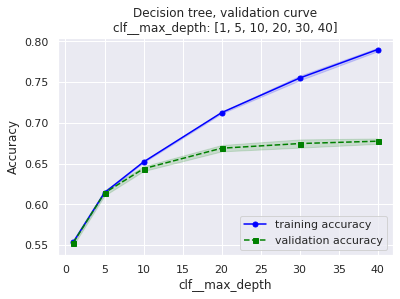

In [12]:
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
tree_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', DecisionTreeClassifier(random_state=random_state, 
                                                      criterion='gini'))])
param_name = 'clf__max_depth'
param_range = [1, 5, 10, 20, 30, 40]
model_name = "Decision tree"
plot_validation_curve(tree_tfidf, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

#### Vectorization parameters

Validation curve for Decision tree, max_depth=20 plotted, took 114.28 seconds (1.90 minutes)


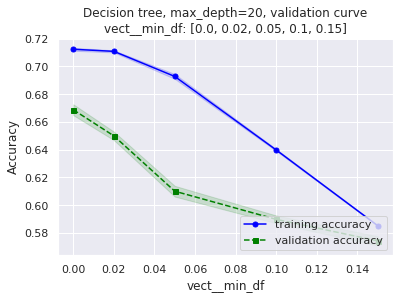

In [14]:
max_depth = 20
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
tree_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', DecisionTreeClassifier(random_state=random_state, 
                                                      criterion='gini',
                                                      max_depth=max_depth))])
param_name = 'vect__min_df'
param_range = [0.0, 0.02, 0.05, 0.1, 0.15]
model_name = "Decision tree, max_depth={0}".format(max_depth)
plot_validation_curve(tree_tfidf, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

Validation curve for Decision tree, max_depth=20 plotted, took 193.95 seconds (3.23 minutes)


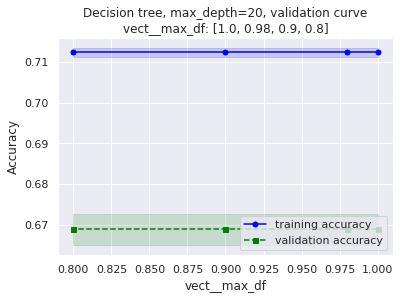

In [15]:
max_depth = 20
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
tree_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', DecisionTreeClassifier(random_state=random_state, 
                                                      criterion='gini',
                                                      max_depth=max_depth))])
param_name = 'vect__max_df'
param_range = [1.0, 0.98, 0.9, 0.8]
model_name = "Decision tree, max_depth={0}".format(max_depth)
plot_validation_curve(tree_tfidf, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

In [16]:
max_depth=20

t = time()

tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, tokenizer=tokenizer)
tree_tfidf = Pipeline([('vect', tfidf), 
                       ('clf', DecisionTreeClassifier(random_state=random_state, 
                                                      criterion='gini',
                                                      max_depth=max_depth))])
param_grid = [{'vect__ngram_range': [(1,1), (1,2), (1,3)]}]
gs_tree_tfidf = GridSearchCV(tree_tfidf, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=8)
gs_tree_tfidf.fit(X_train, y_train)
elapsed = time() - t
print("Grid search completed! Took {0:,.2f} seconds ({1:,.2f} minutes)".format(elapsed, elapsed / 60))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed:  5.8min finished


Grid search completed! Took 458.58 seconds (7.64 minutes)


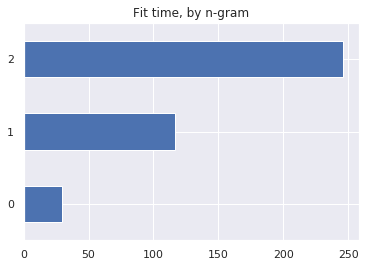

In [18]:
ngram_gs = pd.DataFrame(gs_tree_tfidf.cv_results_)
ngram_gs['mean_fit_time'].plot(kind='barh', title='Fit time, by n-gram');

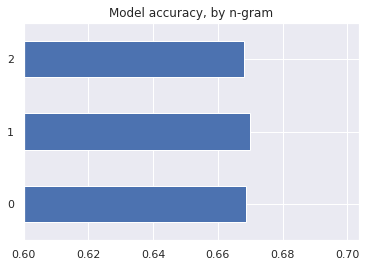

In [21]:
ax = ngram_gs['mean_test_score'].plot(kind='barh', title='Model accuracy, by n-gram')
ax.set_xlim(0.6);

### Random forest

#### Classifier parameters

Validation curve for Random forest plotted, took 4,394.17 seconds (73.24 minutes)


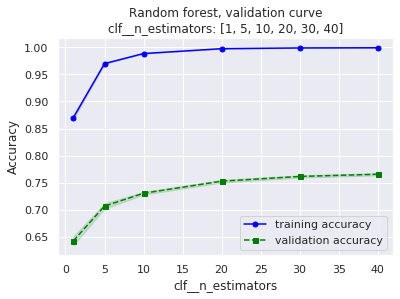

In [22]:
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None,
                        stop_words=None, ngram_range=(1, 1), tokenizer=tokenizer)
forest_tfidf = Pipeline([('vect', tfidf), 
                         ('clf', RandomForestClassifier(random_state=random_state, 
                                                        criterion='gini',
                                                        n_jobs=8))])
param_name = 'clf__n_estimators'
param_range = [1, 5, 10, 20, 30, 40]
model_name = "Random forest"
plot_validation_curve(forest_tfidf, model_name, X_train, y_train, param_name, param_range)

## Bag of words (BoW) 

### Decision tree

#### Classifier parameters

Validation curve for Decision tree plotted, took 289.69 seconds (4.83 minutes)


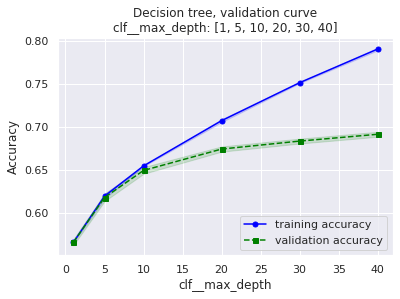

In [24]:
bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)
tree_bow = Pipeline([('vect', bow), 
                     ('clf', DecisionTreeClassifier(random_state=random_state, 
                                                    criterion='gini'))])
param_name = 'clf__max_depth'
param_range = [1, 5, 10, 20, 30, 40]
model_name = "Decision tree"
plot_validation_curve(tree_bow, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

#### Vectorization parameters

Validation curve for Decision tree, max_depth=40 plotted, took 114.87 seconds (1.91 minutes)


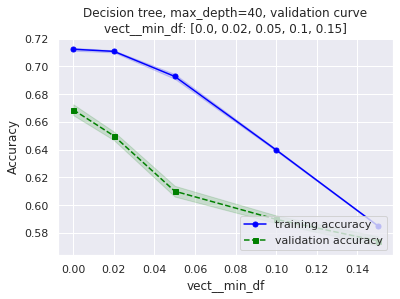

In [25]:
max_depth = 40
bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)
tree_bow = Pipeline([('vect', bow), 
                     ('clf', DecisionTreeClassifier(random_state=random_state, 
                                                    criterion='gini',
                                                    max_depth=max_depth))])
param_name = 'vect__min_df'
param_range = [0.0, 0.02, 0.05, 0.1, 0.15]
model_name = "Decision tree, max_depth={0}".format(max_depth)
plot_validation_curve(tree_tfidf, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

Validation curve for Decision tree, max_depth=40 plotted, took 195.58 seconds (3.26 minutes)


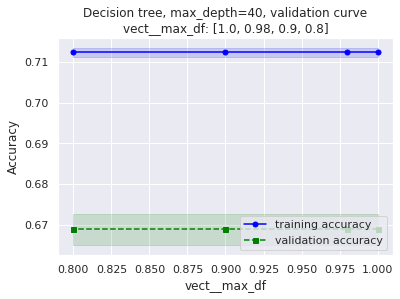

In [26]:
max_depth = 40
bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)
tree_bow = Pipeline([('vect', bow), 
                     ('clf', DecisionTreeClassifier(random_state=random_state, 
                                                    criterion='gini',
                                                    max_depth=max_depth))])
param_name = 'vect__max_df'
param_range = [1.0, 0.98, 0.9, 0.8]
model_name = "Decision tree, max_depth={0}".format(max_depth)
plot_validation_curve(tree_tfidf, model_name, X_train, y_train, param_name, param_range, n_jobs=8)

In [27]:
max_depth = 40

t = time()

bow = CountVectorizer(ngram_range=(1, 1), tokenizer=tokenizer)
tree_bow = Pipeline([('vect', bow), 
                     ('clf', DecisionTreeClassifier(random_state=random_state, 
                                                    criterion='gini',
                                                    max_depth=max_depth))])
param_grid = [{'vect__ngram_range': [(1,1), (1,2), (1,3)]}]
gs_tree_bow = GridSearchCV(tree_bow, param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=8)
gs_tree_bow.fit(X_train, y_train)
elapsed = time() - t
print("Grid search completed! Took {0:,.2f} seconds ({1:,.2f} minutes)".format(elapsed, elapsed / 60))

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  15 out of  15 | elapsed: 18.0min finished


Grid search completed! Took 1,906.95 seconds (31.78 minutes)


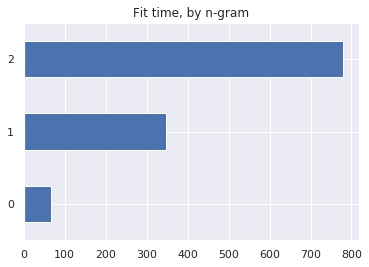

In [28]:
ngram_gs = pd.DataFrame(gs_tree_bow.cv_results_)
ngram_gs['mean_fit_time'].plot(kind='barh', title='Fit time, by n-gram');

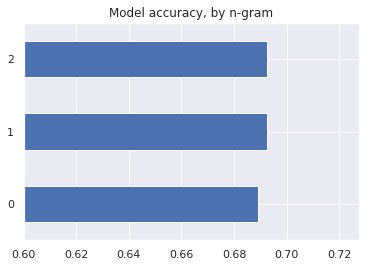

In [29]:
ax = ngram_gs['mean_test_score'].plot(kind='barh', title='Model accuracy, by n-gram')
ax.set_xlim(0.6);